In [3]:
%matplotlib inline
from fitbittools.fbdata import FitBitData                                              
from fitbittools.manipulators import Manipulator
from sklearn import linear_model
import numpy as np
import matplotlib.pyplot as plt

In [4]:
filename="/Users/frenchwr/Computing/Python/Fitbit/data/fitbit_export_20140710.csv"
fb_obj = FitBitData(filename)
manip = Manipulator()
x = manip.convert_to_matrix(fb_obj.sleep.awake)
y = manip.convert_to_matrix(fb_obj.sleep.asleep)
test_frac = 0.20
[x_train,y_train,x_test,y_test] = manip.split_rand(x,y,test_frac)

Training set size:  38
Test size:  9
Test data makes up:  19.1489361702  % of all data


In [5]:
clf = linear_model.LinearRegression(fit_intercept=True)
clf.fit(x_train, y_train)

# The coefficients
print "Coefficients: \n", clf.coef_
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((clf.predict(x_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % clf.score(x_test, y_test))

Coefficients: 
[[ 1.03284351]]
Residual sum of squares: 2633.44
Variance score: 0.15


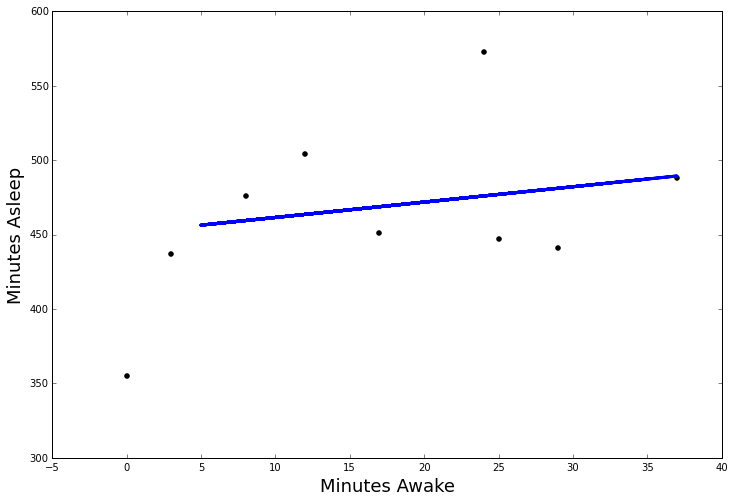

In [7]:
# Plot outputs
plt.figure(figsize=(12,8))
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_train, clf.predict(x_train), color='blue',
         linewidth=3)
plt.xlabel("Minutes Awake",fontsize=18)
plt.ylabel("Minutes Asleep",fontsize=18)

plt.show()